In [4]:
%load_ext autoreload
%autoreload 2

# One Dimensional Diffusion Equation

The One dimensional Diffusion Model is governed by the following pde:

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}$$

Which initial condition:

$$u(x, 0) = a \frac{1}{\sqrt{2 \pi \sigma}}\exp{\left(-\frac{1}{2 \sigma} x^2\right)}$$

Solving this model numerically one would have to discretize this model. 

$$\therefore u_{i}^{n+1} = u_{i}^{n} + \left(D\frac{\Delta t}{\Delta x^2}\right)[u_{i+1}^{n} + u_{i-1}^{n} - 2u_{i}^{n}]$$

See source code `diffuconpy` to see the full implementation of this discretization.

To model the Diffusion Equation, one must consider the number of step the model will advance in time `Nt = 250` and space `Nx = 300`. Also $\Delta t$ which is `dt = 1/Nt` in the code below and $\Delta x$ which is `dx = (5-(-5)/Nx)`. the boundary points on this plot are $-5$ and $5$, at which the initial function is $0$. the Diffusion coefficient `diffusion` is $0.08$.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

import diffuconpy as dc

In [6]:
# Numbers of space and time steps
Nt = 250
Nx = 300

# Space and time step size
dt = (1-0)/Nt
dx = (5-(-5))/Nx

# Convection Coefficient
diffusion = 0.08

# Setting up the initial condition
x = np.arange(-5, 5, dx)

# Initial Array
sigma = 0.1
amp = 1

init = amp*(1/np.sqrt(sigma*2*np.pi))*np.exp(-(1/2)*((x**2)/sigma))

## Solving the PDE

In [7]:
def solve(Nt, Nx, dt, dx, diffusion, init):
    heat_array = dc.diffusion_1dims(Nt, Nx, dt, dx, diffusion, init)
    sol_Dirichlet = heat_array.solve_Dirichlet(boundary=[0, 0])
    sol_Neumann = heat_array.solve_Neumann([0, 0])

    return sol_Dirichlet.solution, sol_Neumann.solution

In [8]:
dirichlet, neumann = solve(Nt, Nx, dt, dx, diffusion, init)

## Plotting the initial condition

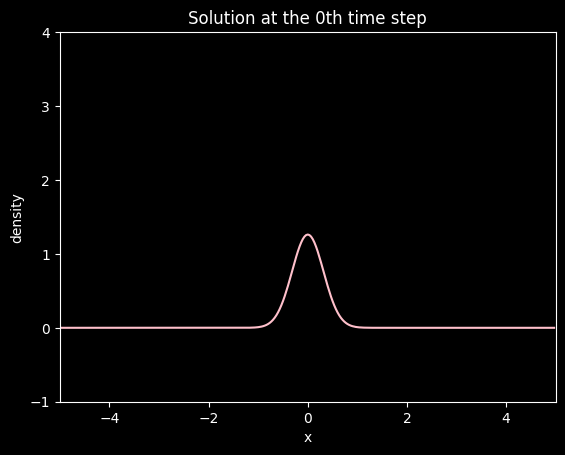

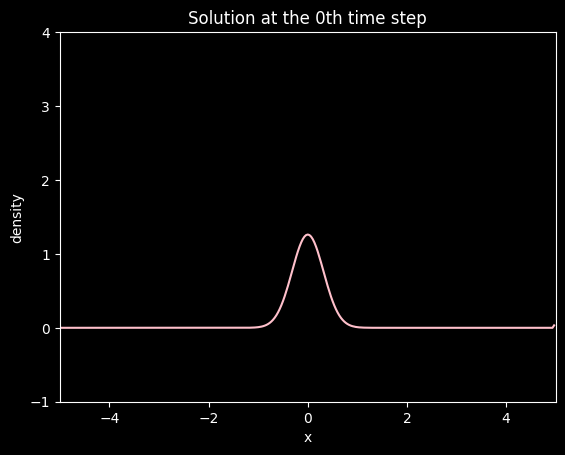

In [14]:
# Plotting the 0th time step state
plt.figure(0)
ax = plt.axes(xlim=(-5, 5), ylim=(-1, 4)) # left bound -5 and right bound 5
ax.plot(x, dirichlet[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

# Plotting the 0th time step state
plt.figure(1)
ax = plt.axes(xlim=(-5, 5), ylim=(-1, 4)) # left bound -5 and right bound 5
ax.plot(x, neumann[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

## Aminating the Solution

In [15]:
# Animates the convection model in 1 dimension
def animation_(solution, X, fps, frn, filename):
        fig = plt.figure()
        ax = plt.axes(xlim=(-5, 5), ylim=(-1, 4)) # left bound -5 and right bound 5
        line, = ax.plot(X, solution[0], color='pink')
        plt.title('diffusion of a gaussian distribution')
        plt.xlabel('x')
        plt.ylabel('PDF')

        # animation function.  This is called sequentially
        def animate(i):
            y = solution[i, :]
            global X
            line.set_ydata(y)
            return line,

        # call the animator.  blit=True means only re-draw the parts that have changed.
        anim = animation.FuncAnimation(fig, animate, frames=frn, interval=20, blit=True)
        
        plt.show()
        anim.save(filename, writer='pillow', fps=fps)

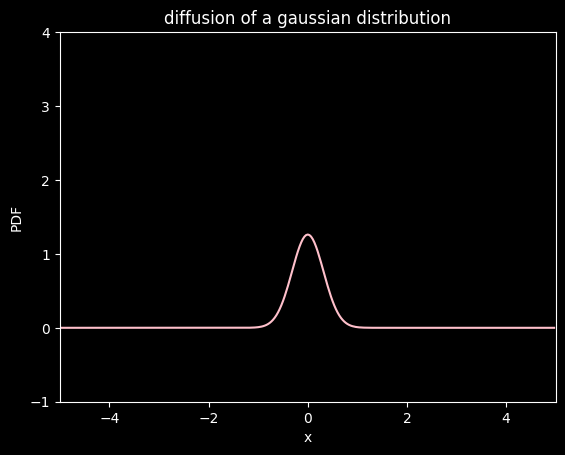

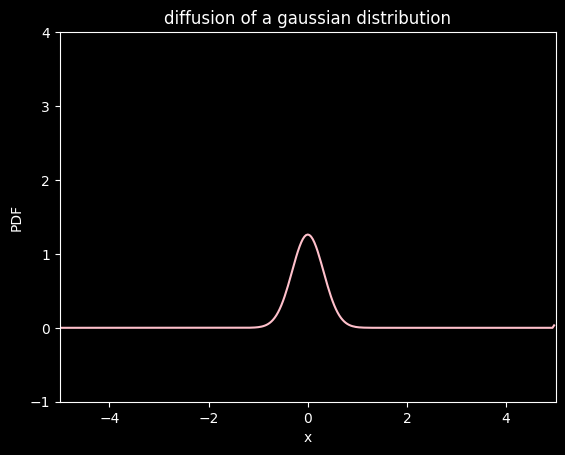

In [16]:
# Setting up the animation
FPS = 60
FRN = 250
FILE_1 = './example-img/diffusion_in_1_dimension_dirichlet.gif'
FILE_2 = './example-img/diffusion_in_1_dimension_neumann.gif'

# Calling the animation_() function defined in the previous cell.
# See the animation at ./example-img/convection_in_1_dimension.gif
animation_(dirichlet, x, FPS, FRN, FILE_1)

animation_(neumann, x, FPS, FRN, FILE_2)